In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

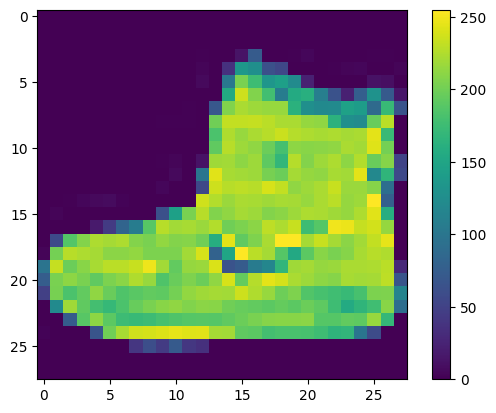

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

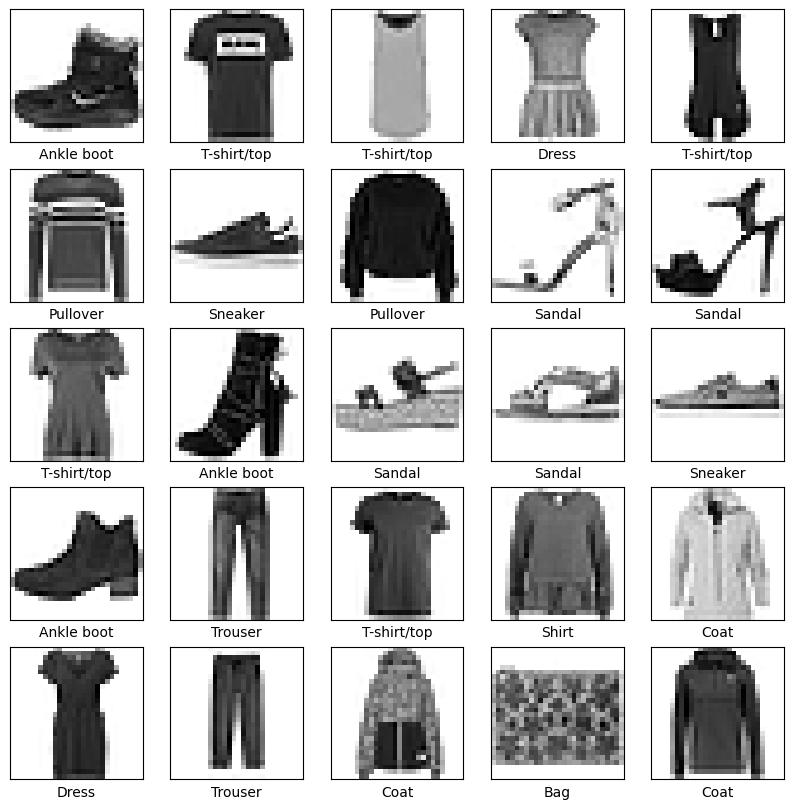

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4982 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3737 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3365 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3117 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2935 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2805 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2681 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2555 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2457 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3387 - accuracy: 0.8812 - 1s/epoch - 4ms/step

Test accuracy: 0.8812000155448914


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 4ms/step


array([1.9480482e-09, 3.7968437e-07, 6.6571293e-10, 1.5110560e-10,
       8.7363423e-09, 1.7279173e-05, 2.7963443e-08, 6.1463141e-03,
       2.2937994e-09, 9.9383599e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]


9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

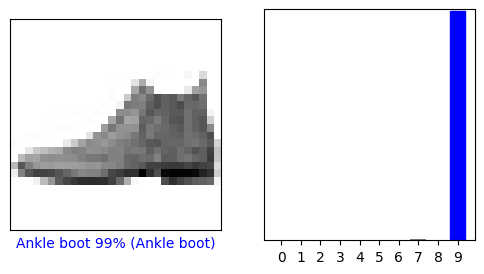

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

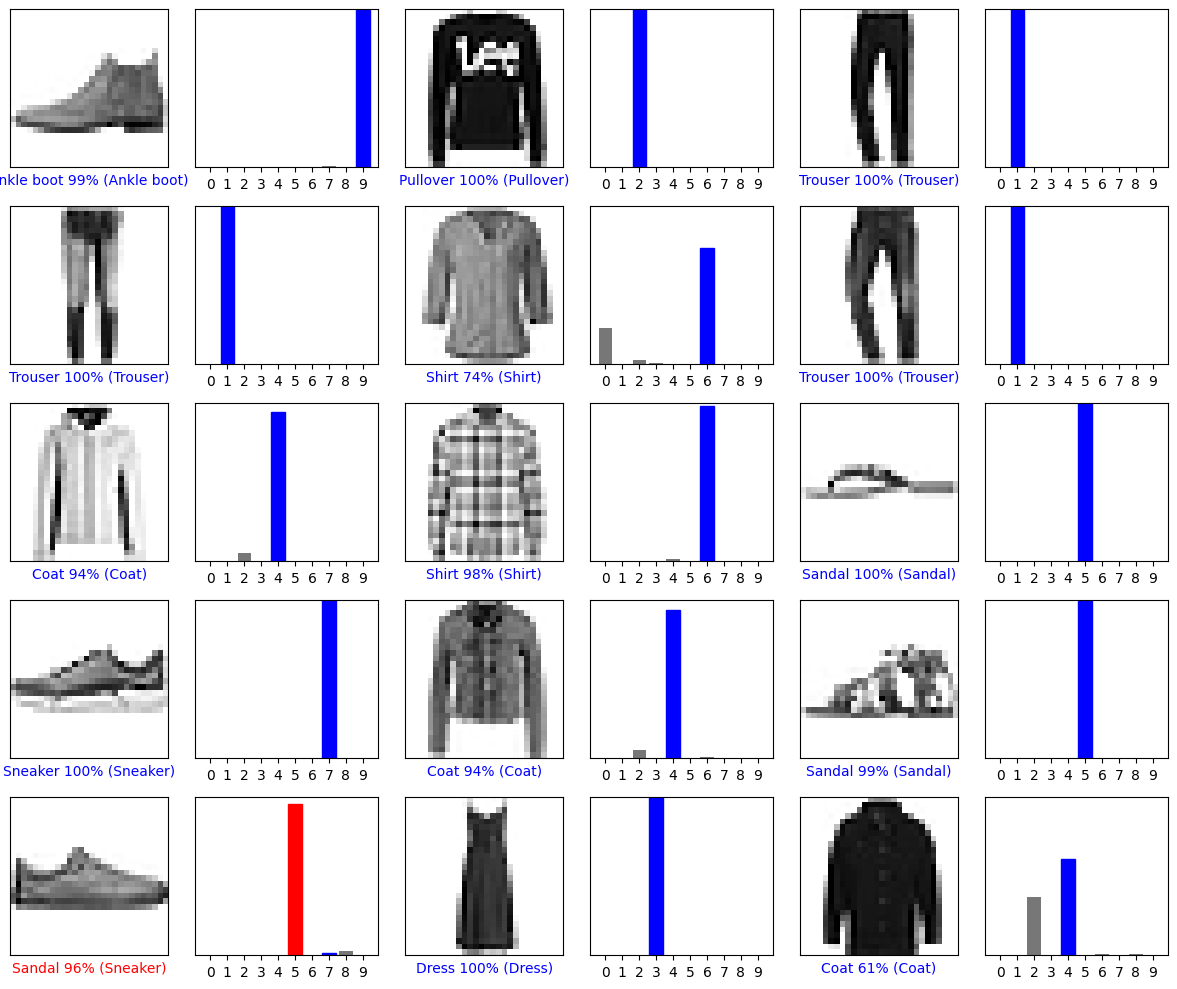

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()